## Time Series Forecasting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## Types of Time Series Data

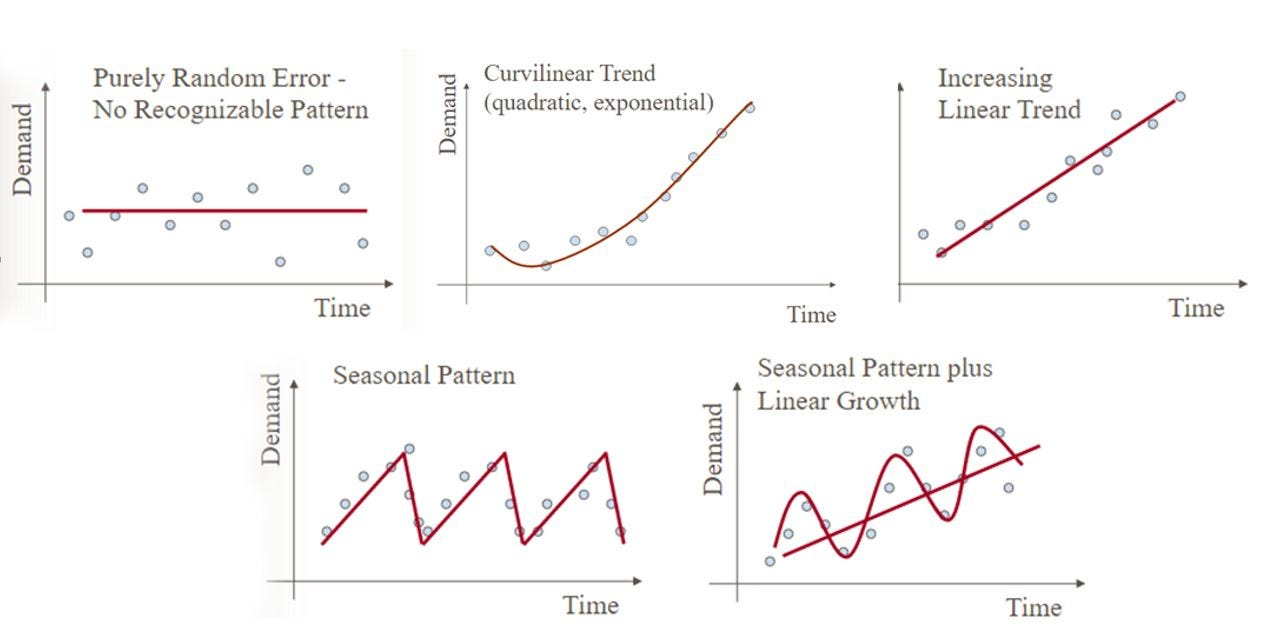

reference: https://engineering.99x.io/time-series-forecasting-in-machine-learning-3972f7a7a467

In [3]:
df = pd.read_csv('PJME_hourly.csv')#read the data
df = df.set_index('Datetime')#set the index to Datetime
df.index = pd.to_datetime(df.index)#convert the index to datetime
df.head()#print the first 5 rows

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


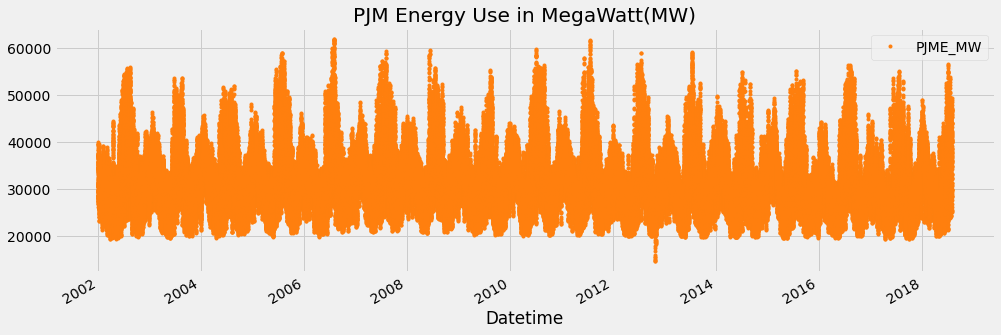

In [4]:
df.plot(style='.', #style of the plot set to dot
        figsize=(15,5),#size of the plot 15  stands for width and 5 stands for height
        color=color_pal[1], #color of the plot  
        title='PJM Energy Use in MegaWatt(MW)')
plt.show()

### Train / Test split
Split part of the data for training and rest to test our model for accuracy.

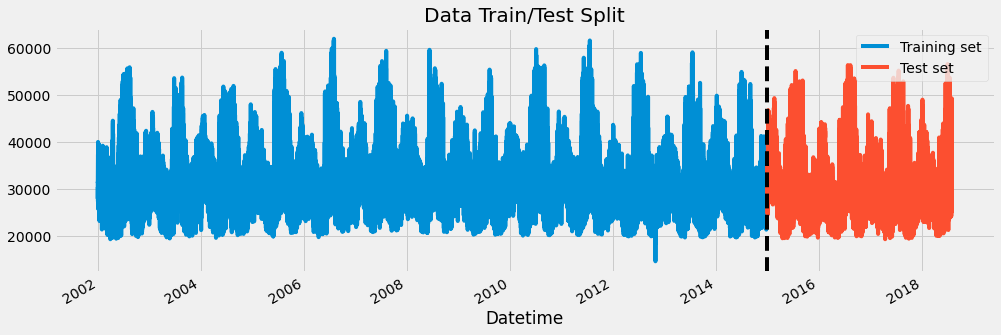

In [5]:
train = df.loc[df.index < '01-01-2015']#train data
test = df.loc[df.index >= '01-01-2015']#test data

fig,ax = plt.subplots(figsize=(15,5))#plotting the train and test data
train.plot(ax=ax,label= 'Training set', title= 'Data Train/Test Split')#plotting the train data
test.plot(ax=ax,label= 'Test set')
ax.axvline('2015-01-01',
           color='black',
           ls='--')#plotting the vertical line
ax.legend(['Training set','Test set'])
plt.show()

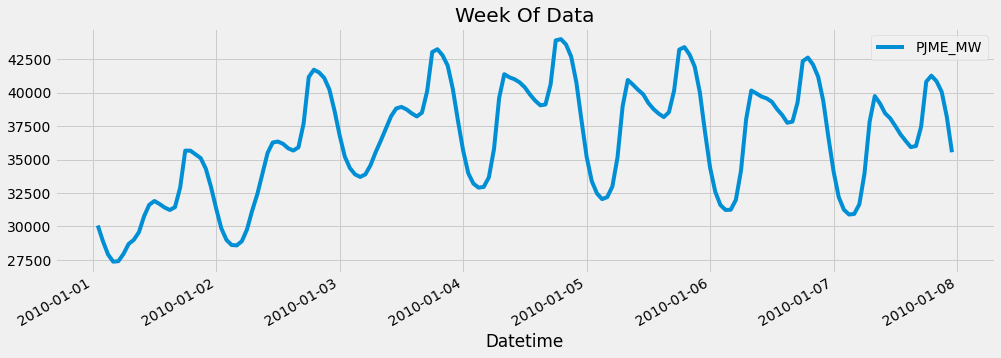

In [6]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')#plotting the weekly data from 2010-01-01 to 2010-01-08 to distinguish pattern
plt.show()

## Feature Engineering

In [7]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [8]:
df #To see the added features

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,1,1


## Visualize Feature / Target Relationship


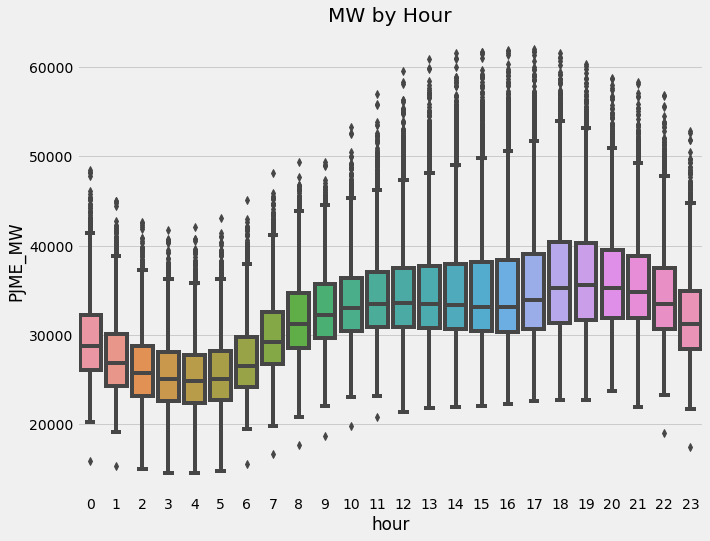

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

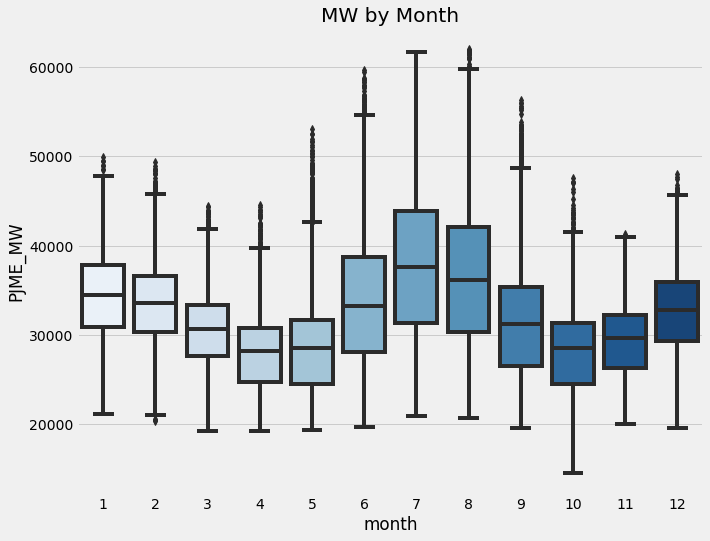

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

## Create our model


In [14]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
#Create the model
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit()